In [4]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import skimage.color
import skimage.draw

In [9]:
# take a close look at the data format of image files 
relative_file_path = 'img_processing_data/chair.jpg'

In [10]:
# read the file
chair = skimage.io.imread(fname=relative_file_path)

In [7]:
chair.shape # 3088 rows, 4160 columns, each data point is a triplet (3)

(3088, 4160, 3)

In [11]:
chair[0,0,:] # RGB color of pixel (0,0)

array([127, 122, 100], dtype=uint8)

In [12]:
# get red channel of pixel (0,0)
chair[0,0,0]

127

In [13]:
# get green channel of pixel (0,0)
chair[0,0,1]

122

In [15]:
chair[0,0,[0,1]]# get red and green 

array([127, 122], dtype=uint8)

In [16]:
chair[0,0,:]# get all channels

array([127, 122, 100], dtype=uint8)

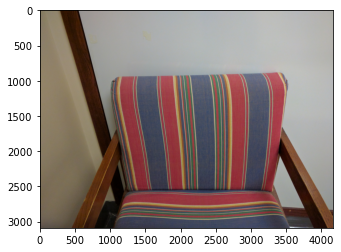

In [17]:
plt.imshow(chair)

In [19]:
image[[1,2],[2,3]] 
# this notation triggers numpy advanced indexing: https://numpy.org/doc/stable/reference/arrays.indexing.html
# it report back element [1,2,:] and [2,3,:]

array([[128, 122, 100],
       [127, 121,  99]], dtype=uint8)

In [20]:
image[1,2]

array([128, 122, 100], dtype=uint8)

In [21]:
image[2,3]

array([127, 121,  99], dtype=uint8)

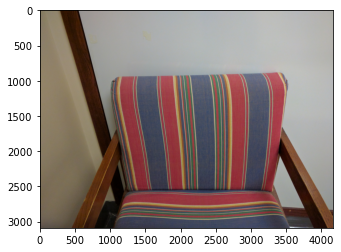

In [29]:
plt.imshow(image)

In [23]:
# make a new shape
new_shape = (chair.shape[0]/2, chair.shape[1]/2, chair.shape[2])
small_chair = skimage.transform.resize(chair, new_shape)

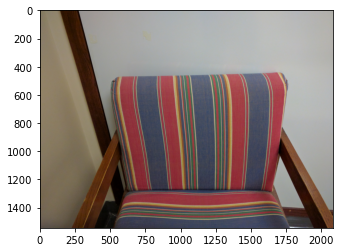

In [24]:
plt.imshow(small_chair)

In [25]:
small_chair.shape

(1544, 2080, 3)

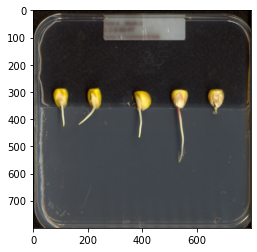

In [39]:
# load the maize seeding picture
maize = skimage.io.imread(fname='img_processing_data/maize-roots.tif')
plt.imshow(maize)

In [40]:
# explain why mask[rr,cc] works
mask = np.ones(shape=maize.shape[0:2], dtype='bool')
# draw a rectangular black area in this blank mask
rr,cc = skimage.draw.rectangle(start = (357,44), end = (740, 720))
# this is a case of advanced indexing for numpy arrays. Advanced indexing is triggered when the selection object, obj, 
# is a non-tuple sequence object, an ndarray (of data type integer or bool), 
# or a tuple with at least one sequence object or ndarray (of data type integer or bool). 

In [41]:
rr.shape # rr's shape

(677, 384)

In [42]:
cc.shape # cc's shape

(677, 384)

In [33]:
type(rr)

numpy.ndarray

In [34]:
type(cc)

numpy.ndarray

In [35]:
# rr and cc are both numpy arrays. They will trigger advanced indexing.
# rr are row indices, and cc are column indices
# see a simpler example
x = np.array([[1, 2], [3, 4], [5, 6]])
x[[0, 1, 2], [0, 1, 0]] # [0,1,2] are row indices and [0,1,0] are column indices

array([1, 4, 5])

In [36]:
# we are selecting x[0,0], x[1,1], and x[2,0]
x[0,0]

1

In [37]:
x[1,1]

4

In [38]:
x[2,0]

5

In [43]:
mask[rr,cc] = False
maize[mask] = 0

In [44]:
maize[mask].shape

(380032, 3)

In [45]:
maize.shape

(800, 800, 3)

In [46]:
maize[mask]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [48]:
mask.shape

(800, 800)

In [49]:
# why the shpae of maize[mask] is (380032, 3)
# again, it's a feature of numpy array advanced indexing
# If obj.ndim == x.ndim, x[obj] returns a 1-dimensional array filled 
# with the elements of x corresponding to the True values of obj.
# https://numpy.org/doc/stable/reference/arrays.indexing.html
# the total number of true element in maize[mask] is:
800*800-677*384

380032